# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.



- Nama : Efitri Apriliyan
- Batch : 015 - RMT
- Objective : Membuat prediksi diagnosa pasien stroke.
- Dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import joblib
import json
import warnings
warnings.simplefilter("ignore")

In [11]:
# Untuk menghandle outlier
!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 - Data Loading

 > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [12]:
# load data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [13]:
# menampilkan data awal
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
# menampilkan data akhir
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [15]:
# copy data
df_copy=df.copy()

In [16]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Terdapat 5110 baris data dan 12 kolom data, dimana terdapat 1 kolom yang mempunyai null values yaitu pada kolom 'bmi'. Dataset memiliki 3 tipe data float, 4 tipe data integer dan 5 tipe data object.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [20]:
#Menampilkan jenis klasifikasi diagnosa stroke
df['stroke'].unique()

array([1, 0])

In [21]:
# Melihat jumlah pasien pada masing-masing klasifikasi diagnosa stroke
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

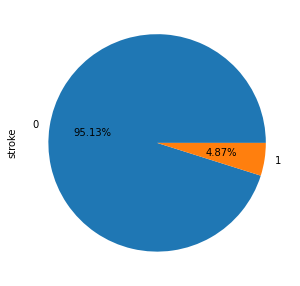

In [22]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['stroke'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Dari grafik terlihat bawah terdapat 249 pasien (4.87%) terdiagnosa stroke dan 4861 pasien (95.13%) tidak terdiagnosa stroke.

In [23]:
#Menampilkan jenis klasifikasi gender
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [24]:
# Melihat jumlah pasien pada masing-masing klasifikasi gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

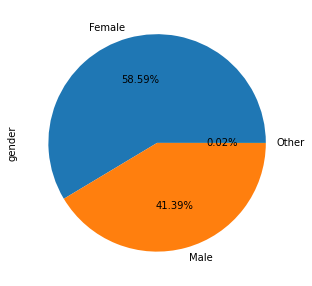

In [25]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['gender'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Pasien wanita lebih banyak sebesar 58.59% dibandingkan laki-laki sebesar 41.39%.

In [26]:
#Menampilkan jenis klasifikasi hipertensi
df['hypertension'].unique()

array([0, 1])

In [27]:
# Melihat jumlah pasien pada masing-masing klasifikasi hipertensi
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

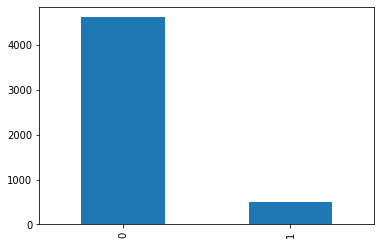

In [28]:
df['hypertension'].value_counts().plot(kind='bar')

Terdapat 498 pasien juga menderita hypertensi dan 4612 lainnya sehat.

In [29]:
#Menampilkan jenis klasifikasi penyakit jantung
df['heart_disease'].unique()

array([1, 0])

In [30]:
# Melihat jumlah pasien pada masing-masing klasifikasi penyakit jantung
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

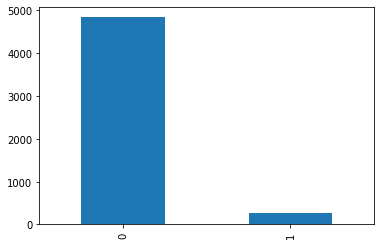

In [31]:
#melihat plot bar pasien yang juga memiliki penyakit jantung
df['heart_disease'].value_counts().plot(kind='bar')

Terdapat 276 pasien juga memiliki penyakit jantung dan 4.834 lainnya tidak.

In [18]:
# melihat distribusi kadar gula darah
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Nilai glukosa rata-rata pasien yang terendah adalah 55.12 dan tertinggi 271.74

In [32]:
#Menampilkan jenis klasifikasi status pernikahan pasien
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
# Melihat jumlah pasien pada masing-masing klasifikasi status pernikahan
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

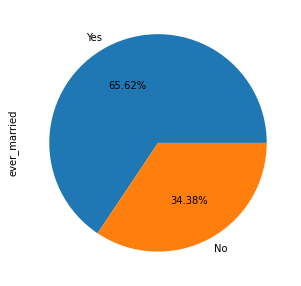

In [34]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['ever_married'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Sejumlah 3.353 (65.62%) pasien pernah menikah dan 1.757(34.38%) lainnya belum pernah menikah.

In [35]:
#Menampilkan jenis pekerjaan pasien
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

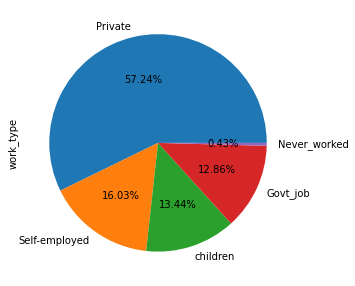

In [36]:
# grafik tipe pekerjaan pasien
df['work_type'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Sebagian besar tipe pekerjaan pasien adalah private.

In [19]:
# melihat tipe tempat tinggal pasien
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

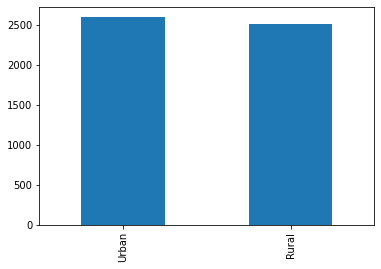

In [129]:
# plot bar tipe daerah tempat tinggal pasien
df['Residence_type'].value_counts().plot(kind='bar')

Sebanyak 2.596 pasien tinggal di perkotaan dan 2.514 pasien tinggal di pedesaan.

Text(0.5, 1.0, 'Number of amount from age')

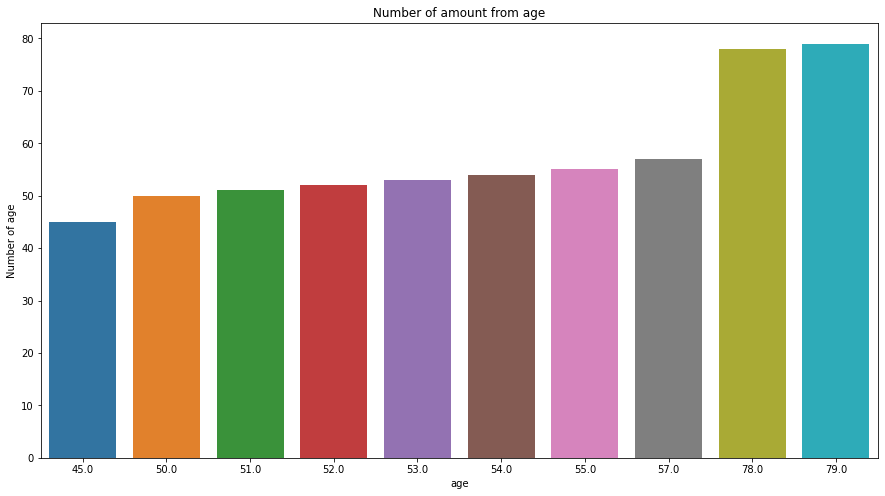

In [37]:
#Melihat grafik usia pasien terbanyak
limit_balance_df = df['age'].value_counts().reset_index().rename(columns={'index': 'age','age': 'count of age'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=limit_balance_df['age'], y=limit_balance_df['age'])
plt.xlabel("age")
plt.ylabel("Number of age")
plt.title("Number of amount from age")

Usia pasien paling banyak adalah rentang dari 45 tahun hingga 79 tahun.

Text(0.5, 1.0, 'Number of amount from bmi')

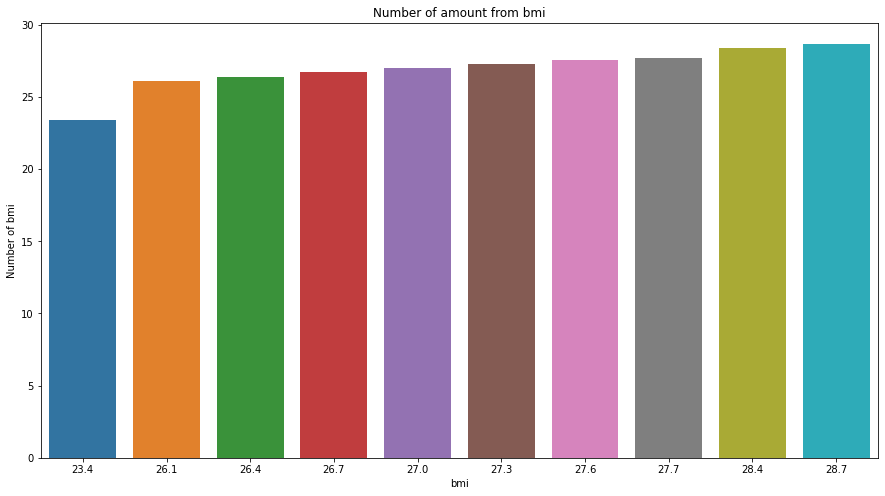

In [38]:
#Melihat grafik bmi pasien terbanyak
limit_balance_df = df['bmi'].value_counts().reset_index().rename(columns={'index': 'bmi','bmi': 'count of bmi'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=limit_balance_df['bmi'], y=limit_balance_df['bmi'])
plt.xlabel("bmi")
plt.ylabel("Number of bmi")
plt.title("Number of amount from bmi")

BMI adalah Body Mass Index/ Indeks Massa Tubuh, yaitu proksi heuristik untuk lemak tubuh manusia berdasarkan berat badan seseorang dan tinggi. 
Dimana range normal BMI adalah 18.5 - 24.2.
Grafik di atas menunjukkan 10 BMI terbanyak yang dimiliki pasien.

In [39]:
#Menampilkan jenis klasifikasi pasien berdasarkan status merokok
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [40]:
#Menampilkan jumlah status perokok pasien
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

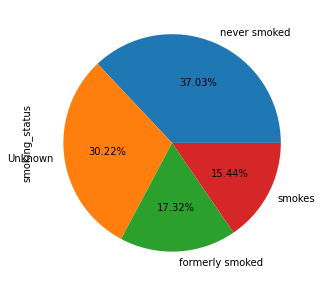

In [41]:
#plot grafik pasien berdasarkan status merokok
df['smoking_status'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Sebanyak 1.892 pasien tidak pernah merokok, 885 pasien pernah merokok sebelumnya dan 789 pasien perokok aktif.

Text(0.5, 1.0, 'Histogram of stroke')

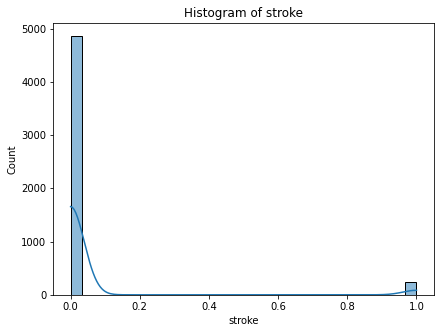

In [42]:
# Distribusi Stroke
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['stroke'], bins=30, kde=True)
plt.title('Histogram of stroke')

Text(0.5, 1.0, 'Histogram of bmi')

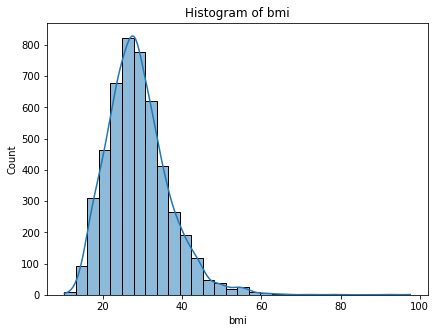

In [43]:
# Distribusi bmi
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Histogram of bmi')

Text(0.5, 1.0, 'Histogram of avg_glucose_level')

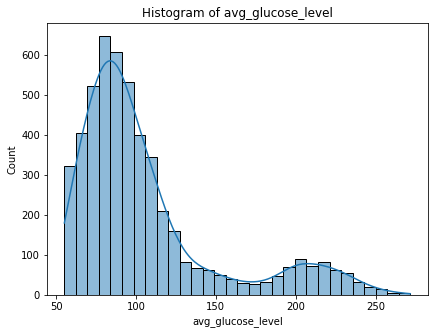

In [44]:
# Distribusi glukosa rata-rata
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title('Histogram of avg_glucose_level')

Text(0.5, 1.0, 'Histogram of age')

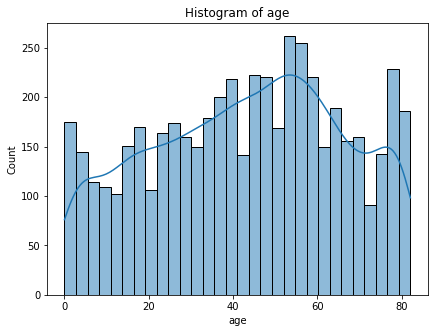

In [45]:
# Distribusi usia
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Histogram of age')

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [46]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=2) #1 angka random. 
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4091,43698,Female,27.0,0,0,No,Govt_job,Rural,65.43,27.2,Unknown,0
3150,69979,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0
2668,43039,Female,63.0,0,0,Yes,Private,Rural,153.60,28.0,formerly smoked,0
793,69427,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0
798,46683,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0
749,34612,Male,55.0,0,0,Yes,Govt_job,Rural,65.12,30.0,never smoked,0
3341,51762,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0
1179,32645,Female,44.0,0,0,Yes,Private,Rural,97.59,30.5,smokes,0
2356,13620,Female,73.0,0,0,Yes,Self-employed,Urban,100.49,23.7,smokes,0
341,38805,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0


In [47]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [48]:
#Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,43698,Female,27.0,0,0,No,Govt_job,Rural,65.43,27.2,Unknown,0
1,69979,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0
2,43039,Female,63.0,0,0,Yes,Private,Rural,153.60,28.0,formerly smoked,0
3,69427,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0
4,46683,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0
5,34612,Male,55.0,0,0,Yes,Govt_job,Rural,65.12,30.0,never smoked,0
6,51762,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0
7,32645,Female,44.0,0,0,Yes,Private,Rural,97.59,30.5,smokes,0
8,13620,Female,73.0,0,0,Yes,Self-employed,Urban,100.49,23.7,smokes,0
9,38805,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0


## Splitting between 'X' (Features) and y (Target)

In [49]:
#Split between 'X' (Features) and 'y' (Target)

X = data_train_test.drop('stroke',  axis = 1)
y = data_train_test['stroke']
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5095,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5096,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5097,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5098,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [50]:
# Membagi data Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (3570, 11)
Test Size :  (1530, 11)


## Handling Outliers

In [51]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini mengambil dataframe (df) dan variable yang akan dilihat distribusinya

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

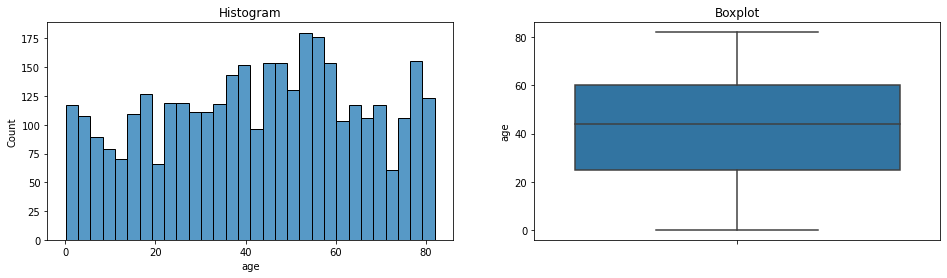


Skewness Value :  -0.1219827643223088


In [52]:
# variabel yang digunakan adalah 'age' dari data X_train

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

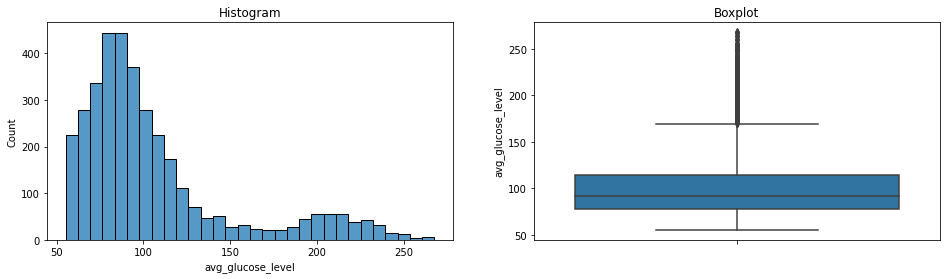


Skewness Value :  1.5756019945637287


In [53]:
# variabel yang digunakan adalah 'avg_glucose_level' dari data X_train

diagnostic_plots(X_train, 'avg_glucose_level')
print('\nSkewness Value : ', X_train['avg_glucose_level'].skew())

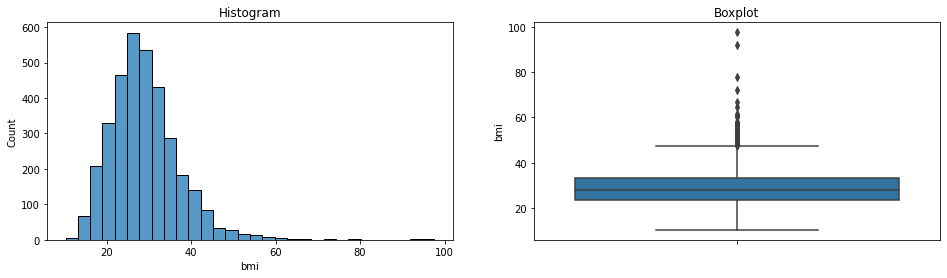


Skewness Value :  1.1579760338757623


In [54]:
# variabel yang digunakan adalah 'bmi' dari data X_train

diagnostic_plots(X_train, 'bmi')
print('\nSkewness Value : ', X_train['bmi'].skew())

In [166]:
# Create the capper

windsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['bmi','avg_glucose_level','age'])

windsorizer.fit(X_train)

#transform caping ke x_train dan x_test
X_train_t = windsorizer.transform(X_train)

In [167]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsorizer.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsorizer.right_tail_caps_)

Left Tail Caps  :  {'bmi': 10.300000000000006, 'avg_glucose_level': 22.18250000000002, 'age': -27.5}
Right Tail Caps :  {'bmi': 46.29999999999999, 'avg_glucose_level': 169.60249999999996, 'age': 112.5}


In [169]:
# Distribusi data sebelum dan sesudah capping
print('Dataframe - Before Capping')
print(X_train.describe())
print('')
print('Dataframe - After Capping')
print(X_train_t.describe())

Dataframe - Before Capping
               age  hypertension  heart_disease  avg_glucose_level  \
count  3570.000000   3570.000000    3570.000000        3570.000000   
mean     42.889916      0.095238       0.052661         105.931647   
std      22.630159      0.293585       0.223387          44.947869   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.465000   
50%      44.000000      0.000000       0.000000          91.650000   
75%      60.000000      0.000000       0.000000         114.320000   
max      82.000000      1.000000       1.000000         267.760000   

               bmi  
count  3570.000000  
mean     28.904398  
std       7.778682  
min      10.300000  
25%      23.800000  
50%      28.000000  
75%      32.800000  
max      97.600000  

Dataframe - After Capping
               age  hypertension  heart_disease  avg_glucose_level  \
count  3570.000000   3570.000000    3570.000000        3

age - Before Capping


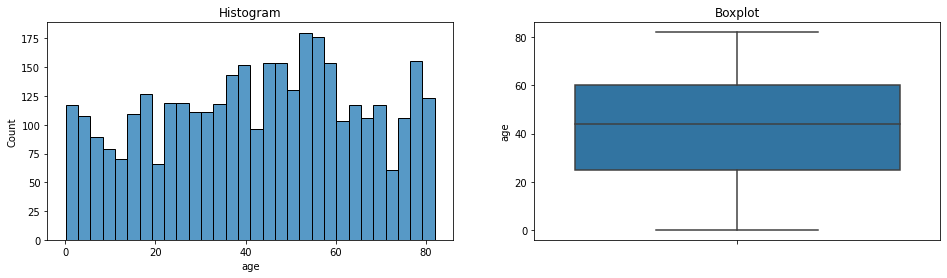


age - After Capping


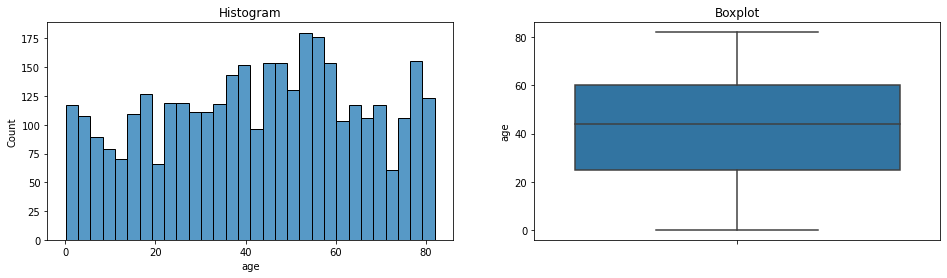

age - Before Capping


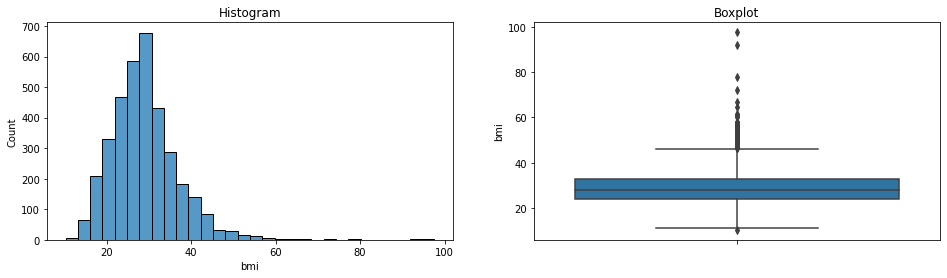


age - After Capping


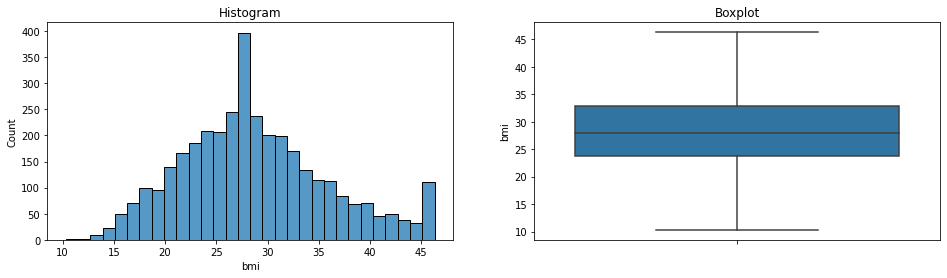

age - Before Capping


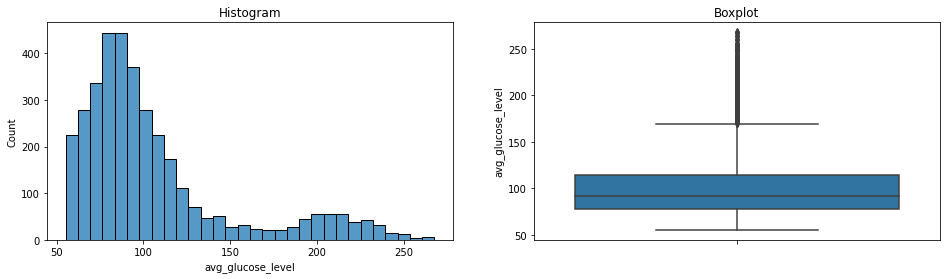


age - After Capping


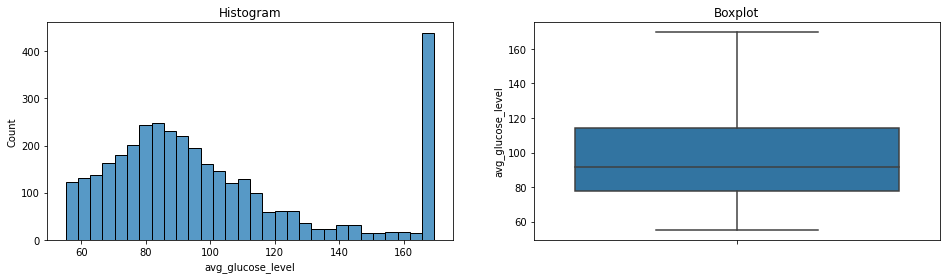

In [170]:
# Let's find outliers in `age`

print('age - Before Capping')
diagnostic_plots(X_train, 'age')
print('\nage - After Capping')
diagnostic_plots(X_train_t, 'age')

# Let's find outliers in `bmi`

print('age - Before Capping')
diagnostic_plots(X_train, 'bmi')
print('\nage - After Capping')
diagnostic_plots(X_train_t, 'bmi')

# Let's find outliers in `avg_glucose_level`

print('age - Before Capping')
diagnostic_plots(X_train, 'avg_glucose_level')
print('\nage - After Capping')
diagnostic_plots(X_train_t, 'avg_glucose_level')

## Missing Values

In [55]:
#Mengecek missing values pada X_train
X_train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  144
smoking_status         0
dtype: int64

Trerdapat 140 missing values pada data X_train, kita akan mengisi dengan nilai mediannya.

In [56]:
median = X_train['bmi'].median()
X_train['bmi'].fillna(median, inplace=True)

In [57]:
X_train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

Sudah tidak terdapat missing values pada X_train.

In [58]:
#Mengecek missing values pada X_test
X_test.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  57
smoking_status        0
dtype: int64

Terdapat 60 missing values pada data X_test, kita akan mengisi dengan nilai mediannya.

In [59]:
median = X_test['bmi'].median()
X_test['bmi'].fillna(median, inplace=True)

In [60]:
#Mengecek missing values pada X_test
X_test.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

Sudah tidak terdapat missing values pada X_test.

In [61]:
#Mengecek missing values pada y_train
y_train.isnull().sum()

0

In [62]:
#mengecek missing values pada y_test
y_test.isnull().sum()

0

## Feature Selection

Kita akan melihat korelasi feature dengan target menggunakan heatmap.

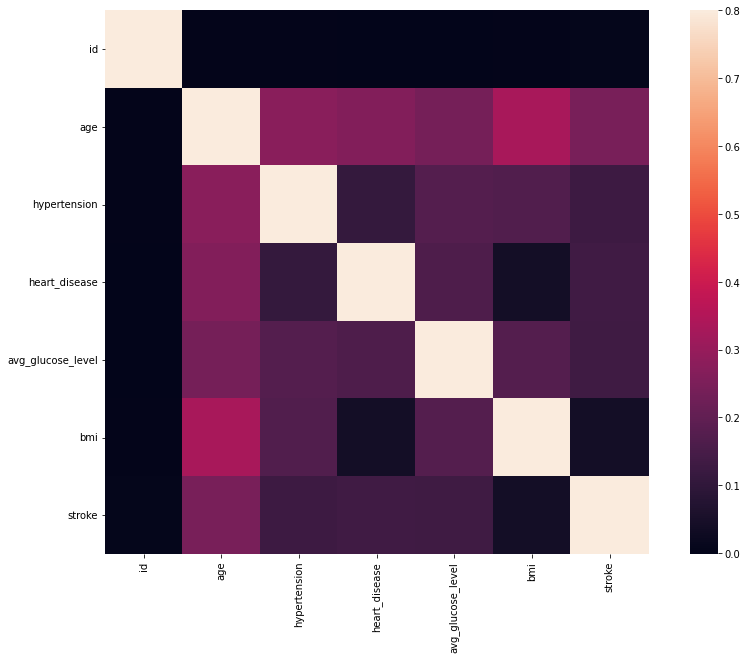

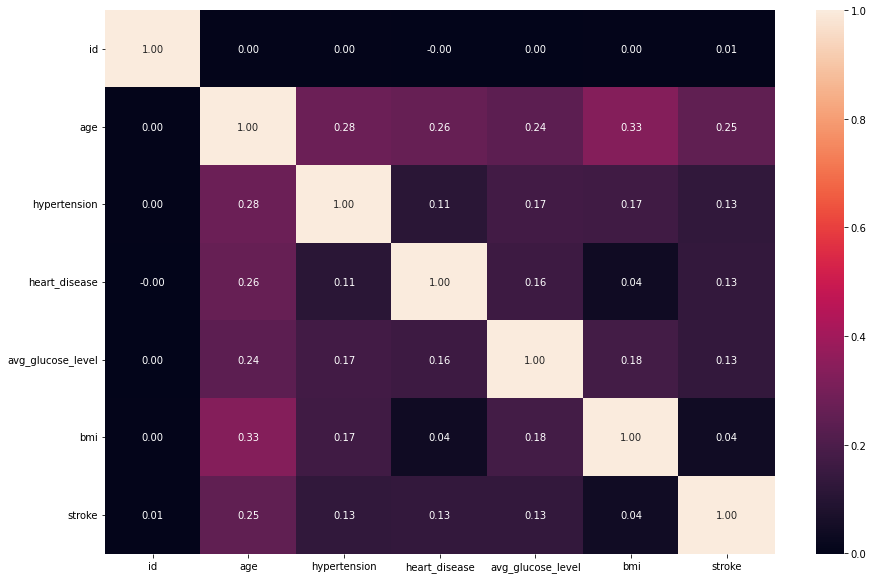

In [63]:
# Heatmap Correlation Matrix

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), vmax=.8, square=True);

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Semua kolom memiliki korelasi dengan target, dan karena variabel data adalah data kesehatan, maka kita akan menggunakan semua kolomnya kecuali id.

In [64]:

X_train.drop('id', axis=1, inplace=True)
X_test.drop('id', axis=1, inplace=True)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3931,Male,8.0,0,0,No,children,Urban,78.76,28.0,Unknown
3592,Female,27.0,0,0,No,Private,Urban,82.05,21.0,Unknown
2317,Female,52.0,1,0,Yes,Self-employed,Rural,111.38,28.0,smokes
4463,Female,63.0,0,0,Yes,Self-employed,Urban,60.67,28.9,formerly smoked
2162,Male,40.0,0,0,Yes,Private,Rural,80.25,30.3,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
2952,Female,32.0,0,0,Yes,Private,Rural,147.04,35.7,Unknown
4587,Female,29.0,0,0,Yes,Private,Rural,108.14,25.1,formerly smoked
356,Female,36.0,0,0,No,Govt_job,Rural,126.82,23.3,never smoked
4908,Male,75.0,0,0,Yes,Govt_job,Rural,79.49,28.9,Unknown


## Split between Numerical Columns and Categorical Columns

In [65]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical Columns :  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [99]:
list_num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
list_cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [66]:
# Split Train-Set and Test-Set based on Column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,hypertension,heart_disease,avg_glucose_level,bmi
3931,8.0,0,0,78.76,28.0
3592,27.0,0,0,82.05,21.0
2317,52.0,1,0,111.38,28.0
4463,63.0,0,0,60.67,28.9
2162,40.0,0,0,80.25,30.3
...,...,...,...,...,...
2952,32.0,0,0,147.04,35.7
4587,29.0,0,0,108.14,25.1
356,36.0,0,0,126.82,23.3
4908,75.0,0,0,79.49,28.9


## **Building Pipeline**

In [100]:
num_transformers = Pipeline([("scaler", StandardScaler())])

cat_transformers = Pipeline([("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformers, list_num_cols),
        ("cat", cat_transformers, list_cat_cols),
    ]
)


## Random Forest Classifier Hyperparameter Manual

In [174]:
#mendefinisikan model pipeline dengan hyperparameter tuning manual
pipe = Pipeline([("prep", preprocessor), ("random_forest", RandomForestClassifier(n_estimators=30, max_features=3, criterion='gini', max_depth=10, random_state=1))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                               

In [175]:
#memprediksi data train dan test
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [177]:
#Melihat akurasi skor pada data train dan test
print('recall score train : ',recall_score(y_train,y_train_pred))
print('recall score test : ',recall_score(y_test,y_test_pred))

recall score train :  0.3105590062111801
recall score test :  0.011363636363636364


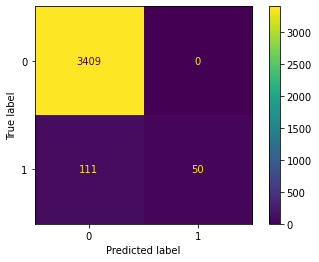

In [159]:
cm = confusion_matrix(y_train, y_train_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)

disp.plot()
plt.show()

In [104]:
#Menampilkan calssification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3409
           1       1.00      0.31      0.47       161

    accuracy                           0.97      3570
   macro avg       0.98      0.66      0.73      3570
weighted avg       0.97      0.97      0.96      3570



- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 31% diagnosa stroke. 
- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, 50 terdiagnosa stroke dan 111 terdiagnosa sehat.
- Model Overfit

## Random Forest Classifier Hypermarameter GridSearchCV

In [130]:
#memberikan input pada hyperparameter yang akan digunakan
param_grid = {'random_forest__n_estimators': [80, 100, 120],
              'random_forest__criterion':['gini','entropy'],
               'random_forest__max_features': ['auto','log2'],
               'random_forest__max_depth': [10,20],
               'random_forest__min_samples_split': [2, 5, 1],
               'random_forest__min_samples_leaf': [1, 2, 4],
               }
param_grid

{'random_forest__n_estimators': [80, 100, 120],
 'random_forest__criterion': ['gini', 'entropy'],
 'random_forest__max_features': ['auto', 'log2'],
 'random_forest__max_depth': [10, 20],
 'random_forest__min_samples_split': [2, 5, 1],
 'random_forest__min_samples_leaf': [1, 2, 4]}

In [131]:
#mendefinisikan gridsearch
grid_pipe = GridSearchCV(pipe, param_grid)

In [132]:
#melatih grid search pipline
grid_pipe.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                        

In [135]:
#mencari model terbaik
best = grid_pipe.best_params_

In [136]:
best

{'random_forest__criterion': 'gini',
 'random_forest__max_depth': 10,
 'random_forest__max_features': 'auto',
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 80}

In [161]:
#memasukkan hyperparam terbaik pada pipeline
pipe6 = Pipeline([("prep", preprocessor), ("random_forest", RandomForestClassifier(n_estimators=80, max_features='auto', criterion='gini', max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=1))])

In [162]:
#melatih ke data train dan tes
pipe6.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                               

In [163]:
#memprediksi data train dan test
y_train_pred6 = pipe6.predict(X_train)
y_test_pred6 = pipe6.predict(X_test)

In [164]:
#Melihat recall skor pada data train dan test
print('recall score train : ',recall_score(y_train,y_train_pred6))
print('recall score test : ',recall_score(y_test,y_test_pred6))

accuracy score train :  0.30434782608695654
accuracy score test :  0.0


Setelah melakukan predict model menggunakan hyperparameter tuning dengan Grid Search CV, hasil model tidak lebih baik karena sangat overfit dan nilai recall score pada data test adalah 0.

## Desicion Tree

In [110]:
#mendefinisikan model pipeline
pipe2 = Pipeline([("prep", preprocessor), ("desicion_tree", DecisionTreeClassifier(max_depth=20, random_state=0))])
pipe2.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                               

In [111]:
#memprediksi model pada data train dan test
y_train_pred2 = pipe2.predict(X_train)
y_test_pred2 = pipe2.predict(X_test)

In [178]:
#Melihat recall skor pada data train dan test
print('recall score train : ',recall_score(y_train,y_train_pred2))
print('recall score test : ',recall_score(y_test,y_test_pred2))

recall score train :  1.0
recall score test :  0.20454545454545456


In [113]:
#Menampilkan calssification report
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3409
           1       1.00      1.00      1.00       161

    accuracy                           1.00      3570
   macro avg       1.00      1.00      1.00      3570
weighted avg       1.00      1.00      1.00      3570



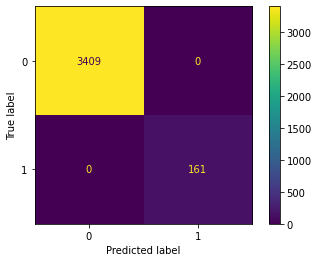

In [115]:
cm = confusion_matrix(y_train, y_train_pred2, labels=pipe2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe2.classes_)

disp.plot()
plt.show()

- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 100% diagnosa stroke.

- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, berhasil terdiagnosa 161 stroke.

- Model Overfit.

## Gradient Boosting

In [76]:
#mendefinisikan model pada pipeline
pipe3 = Pipeline([("prep", preprocessor), ("gradient_boosting", GradientBoostingClassifier(max_depth=20, random_state=1))])
pipe3.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                               

In [77]:
#memprediksi model pada data train dan test
y_train_pred3 = pipe3.predict(X_train)
y_test_pred3 = pipe3.predict(X_test)

In [179]:
#Melihat recall skor pada data train dan test
print('recall score train : ',recall_score(y_train,y_train_pred3))
print('recall score test : ',recall_score(y_test,y_test_pred3))

recall score train :  1.0
recall score test :  0.1590909090909091


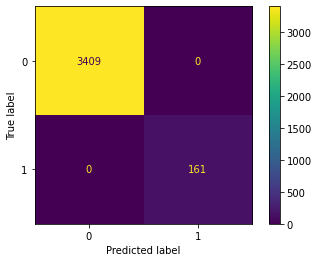

In [116]:
cm = confusion_matrix(y_train, y_train_pred3, labels=pipe3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe3.classes_)

disp.plot()
plt.show()

In [117]:
#Menampilkan calssification report
print(classification_report(y_train,y_train_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3409
           1       1.00      1.00      1.00       161

    accuracy                           1.00      3570
   macro avg       1.00      1.00      1.00      3570
weighted avg       1.00      1.00      1.00      3570



- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 100% diagnosa stroke.

- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, berhasil terdiagnosa 161 stroke.

- Model Overfit.

## Logistic Regression

In [80]:
#mendefinisikan model pada pipeline
pipe4 = Pipeline([("prep", preprocessor), ("log_reg", LogisticRegression(class_weight = 'balanced', solver ='lbfgs', random_state=1))])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                               

In [81]:
#memprediksi model pada data train dan data test
y_train_pred4 = pipe4.predict(X_train)
y_test_pred4 = pipe4.predict(X_test)

In [180]:
#Melihat recall skor pada data train dan test
print('recall score train : ',recall_score(y_train,y_train_pred4))
print('recall score test : ',recall_score(y_test,y_test_pred4))

recall score train :  0.8385093167701864
recall score test :  0.7613636363636364


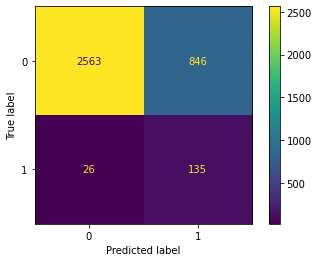

In [118]:
cm = confusion_matrix(y_train, y_train_pred4, labels=pipe4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe4.classes_)

disp.plot()
plt.show()

In [83]:
#Menampilkan calssification report
print(classification_report(y_train,y_train_pred4))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      3409
           1       0.14      0.84      0.24       161

    accuracy                           0.76      3570
   macro avg       0.56      0.80      0.55      3570
weighted avg       0.95      0.76      0.83      3570



- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 75% dengan benar pasien sehat dan dapat memprediksi 84% dengan benar pasien stroke.
- Sejumlah 2.563 pasien sehat berhasil terdiagnosa sehat dan 846 pasien sehat terdiagnosa stroke. 
- Sejumlah 135 total pasien stroke, berhasil terdiagnosa stroke dan 26 pasien stroke terdiagnosa sehat.

- Gap data train set dan test set tidak etrlalu besar, namun dikatakan overfit jika diaplikasikan pada data kesehatan.

# 8 - Model Saving

> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [105]:
# Save Model

with open('pipe.pkl', 'wb') as file_1 :
  joblib.dump(pipe, file_1)
with open('list_num_cols.txt', 'w') as file_2 :
  json.dump(list_num_cols, file_2)
with open('list_cat_columns.txt', 'w') as file_3 :
  json.dump(list_cat_cols, file_3)

In [106]:
# Load Model

with open('pipe.pkl', 'rb') as file_1:
  pipe = joblib.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_cols = json.load(file_2)

with open('list_cat_columns.txt', 'r') as file_3:
  list_cat_cols = json.load(file_3)

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [89]:
#Menampilkan Data Inference

data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,43698,Female,27.0,0,0,No,Govt_job,Rural,65.43,27.2,Unknown,0
1,69979,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0
2,43039,Female,63.0,0,0,Yes,Private,Rural,153.60,28.0,formerly smoked,0
3,69427,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0
4,46683,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0
5,34612,Male,55.0,0,0,Yes,Govt_job,Rural,65.12,30.0,never smoked,0
6,51762,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0
7,32645,Female,44.0,0,0,Yes,Private,Rural,97.59,30.5,smokes,0
8,13620,Female,73.0,0,0,Yes,Self-employed,Urban,100.49,23.7,smokes,0
9,38805,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0


In [90]:
data_inf_ = data_inf.drop('id', axis=1, inplace = True)


In [91]:
data_inf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,27.0,0,0,No,Govt_job,Rural,65.43,27.2,Unknown,0
1,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0
2,Female,63.0,0,0,Yes,Private,Rural,153.60,28.0,formerly smoked,0
3,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0
4,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0
5,Male,55.0,0,0,Yes,Govt_job,Rural,65.12,30.0,never smoked,0
6,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0
7,Female,44.0,0,0,Yes,Private,Rural,97.59,30.5,smokes,0
8,Female,73.0,0,0,Yes,Self-employed,Urban,100.49,23.7,smokes,0
9,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0


In [92]:
#memisahkan target data inference
data_inf_final = data_inf.drop('stroke', axis=1)
y_inf = data_inf['stroke']

In [96]:
#Memprediksi menggunakan random forest
y_pred_inf = pipe.predict(data_inf)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
# Mengubah kolom hasil prediksi dalam dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['stroke_prediction'])
y_pred_inf_df

,stroke_prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [98]:
# Menggabungkan hasil prediksi dan target prediksi data inference ke dalam data inference
pd.concat([data_inf, y_pred_inf_df], axis = 1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_prediction
0,Female,27.0,0,0,No,Govt_job,Rural,65.43,27.2,Unknown,0,0
1,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0,0
2,Female,63.0,0,0,Yes,Private,Rural,153.60,28.0,formerly smoked,0,0
3,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0,0
4,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0,0
5,Male,55.0,0,0,Yes,Govt_job,Rural,65.12,30.0,never smoked,0,0
6,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0,0
7,Female,44.0,0,0,Yes,Private,Rural,97.59,30.5,smokes,0,0
8,Female,73.0,0,0,Yes,Self-employed,Urban,100.49,23.7,smokes,0,0
9,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0,0


# 10 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Model Random Forest Hyperparameter Manual:
- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 31% diagnosa stroke.

- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, 50 terdiagnosa stroke dan 111 terdiagnosa sehat.
- Model Overfit

Model Desicion Tree :
- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 100% diagnosa stroke.

- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, berhasil terdiagnosa 161 stroke.

- Model Overfit.

Model Gradient Boosting:
- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 100% dengan benar diagnosa sehat dan 100% diagnosa stroke.

- Sejumlah 3.409 pasien sehat berhasil terdiagnosa seluruhnya 3.409 sehat, dan dari 161 total pasien stroke, berhasil terdiagnosa 161 stroke.

- Model Overfit.

Model Logistic Regression : 
- Berdasarkan hasil recall diketahui bahwa model dapat memprediksi 75% dengan benar pasien sehat dan dapat memprediksi 84% dengan benar pasien stroke.

- Sejumlah 2.563 pasien sehat berhasil terdiagnosa sehat dan 846 pasien sehat terdiagnosa stroke.

- Sejumlah 135 total pasien stroke, berhasil terdiagnosa stroke dan 26 pasien stroke terdiagnosa sehat.

- Gap data train set dan test set tidak etrlalu besar, namun dikatakan overfit jika diaplikasikan pada data kesehatan.




-Dari hasil 4 pemodelan yang dilakukan, dan mencoba keempatnya pada data inference, ditemukan bahwa model yang terbaik adalah menggunakan algoritma Random Forest dengan hyperparameter Tuning  Manual yang diberikan adalah n_estimators=30, max_features=3, criterion='gini', max_depth=10.
Hal ini dikarenakan, hasil prediksi pada data Inference menggunakan algoritma ini sama persis dengan data aktualnya, sedangkan dengan ketiga model lainnya terdapat beberapa hasil prediksi yang salah.

-Berdasarkan hasil EDA terdapat 4861 pasien terdiagnosa tidak stroke dan 249 pasien terdiagnosa stroke.

-Pasien wanita lebih banyak sebesar 58.59% dibandingkan laki-laki sebesar 41.39%.

-Terdapat 498 pasien juga menderita hypertensi dan 4612 lainnya sehat.

-Terdapat 276 pasien juga memiliki penyakit jantung dan 4.834 lainnya tidak.

-Sebanyak 1.892 pasien tidak pernah merokok, 885 pasien pernah merokok sebelumnya dan 789 pasien perokok aktif.

-Usia pasien paling banyak adalah rentang dari 45 tahun hingga 79 tahun.

-BMI adalah Body Mass Index/ Indeks Massa Tubuh, yaitu proksi heuristik untuk lemak tubuh manusia berdasarkan berat badan seseorang dan tinggi. Dimana range normal BMI adalah 18.5 - 24.2.
BMI terbanyak yang dimilik pasien adalah 28.

-Sebanyak 2.596 pasien tinggal di perkotaan dan 2.514 pasien tinggal di pedesaan.

